# Lab Assignment 2
<a href='https://courses.edx.org/courses/course-v1:Microsoft+DAT210x+4T2016/courseware/1aabc1638cb64c699ddc447d16e3cfea/fcc6fcce0493405bb3b52de2f4486384/?child=first'>link</a>

In Lab Assignment 1, you applied PCA to a dataset generated by 3D-scanning an actual sculpture. Real life 3D objects are a good segue to PCA, since it's fun to see its effects on a dataset we can see and touch. Another benefit is that all three spatial dimensions, x, y, and z, each measure the same unit-length relative to one another, so no extra consideration need be made to account for PCA's weakness of requiring feature scaling.

But now the fun is over. Gaining some practical experience with real-world datasets, which rarely allot you the luxury of having features all on the same scale, will help you see how critical feature scaling is to PCA. In this lab, you're going to experiment with a subset of UCI's <a href='https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease'>Chronic Kidney Disease data set</a>, a collection of samples taken from patients in India over a two month period, some of whom were in the early stages of the disease. The starter code over at /Module4/assignment2.py.

1. Start by looking through the attribute information on the dataset website. Whenever you're given a dataset, the first thing you should do is find out as much about it as possible, both by reading up on any metadata, as well as by prodding through the actual data. Particularly, pay attention to what the docs say about these three variables: bgr, rc, and wc.
2. Load up the kidney_disease.csv dataset from the /Module4/Datasets/ directory, and drop all rows that have any nans. You're probably already a pro at doing that by now. In addition to getting rid of nans, did you know that the .dropna() method (upon completion) also automatically re-checks your features and assigns them an appropriate inferred data types?
3. Use an appropriate indexer command to select only the following columns: bgr, rc, and wc. Or alternatively, you can drop every other column, but it's probably easier to just use an indexer to select the one's you wish to keep.
4. Do a check of your dataframe's dtypes. Anything that didn't make it to the right type, you may want to investigate. Look through the data and identify why the conversion failed. These types of problems often arise when you aren't in control of how your data is organized. Luckily the issue isn't too bad so once you've identified it, you can fix it through simple numeric coercion.
5. Print the variance of your dataset, as well as a .describe() printout.
6. Reduce your dataset to two principal components by run it through PCA, then check out the resulting visualization.

In [67]:
# imports and config
from sklearn.decomposition import PCA
from sklearn import preprocessing

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

data_ff = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module4\PCA\Datasets\kidney_disease.csv'


In [61]:
# load the data
df = pd.read_csv(data_ff); 
print(df.columns)
df

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [62]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA

labels = ['red' if i=='ckd' else 'green' for i in df.classification]; labels

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red'

 1.Start by looking through the attribute information on the dataset website. Whenever you're given a dataset, the first thing you should do is find out as much about it as possible, both by reading up on any metadata, as well as by prodding through the actual data. Particularly, pay attention to what the docs say about these three variables: bgr, rc, and wc.
 
<a href='https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease'>Chronic Kidney Disease data set website</a>
 
### Data Set Information

* age	-	age	
* bp	-	blood pressure 
* sg	-	specific gravity 
* al	- albumin 
* su	-	sugar 
* rbc	-	red blood cells 
* pc	-	pus cell 
* pcc	-	pus cell clumps 
* ba	-	bacteria 
* <b>bgr	-	blood glucose random</b>
* bu	-	blood urea 
* sc	-	serum creatinine 
* sod	-	sodium 
* pot	-	potassium 
* hemo	-	hemoglobin 
* pcv	-	packed cell volume 
* <b>wc	-	white blood cell count</b> 
* <b>rc	-	red blood cell count</b> 
* htn	-	hypertension 
* dm	-	diabetes mellitus 
* cad	-	coronary artery disease 
* appet	-	appetite 
* pe	-	pedal edema 
* ane	-	anemia 
* class	-	class

### Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal) 
1. Age(numerical) 
age in years 
2. Blood Pressure(numerical) 
bp in mm/Hg 
3. Specific Gravity(nominal) 
sg - (1.005,1.010,1.015,1.020,1.025) 
4. Albumin(nominal) 
al - (0,1,2,3,4,5) 
5. Sugar(nominal) 
su - (0,1,2,3,4,5) 
6. Red Blood Cells(nominal) 
rbc - (normal,abnormal) 
7. Pus Cell (nominal) 
pc - (normal,abnormal) 
8. Pus Cell clumps(nominal) 
pcc - (present,notpresent) 
9. Bacteria(nominal) 
ba - (present,notpresent) 
10. <b>Blood Glucose Random(numerical)	
bgr in mgs/dl</b> 
11. Blood Urea(numerical)	
bu in mgs/dl 
12. Serum Creatinine(numerical)	
sc in mgs/dl 
13. Sodium(numerical) 
sod in mEq/L 
14. Potassium(numerical)	
pot in mEq/L 
15. Hemoglobin(numerical) 
hemo in gms 
16. Packed Cell Volume(numerical) 
17. <b>White Blood Cell Count(numerical) 
wc in cells/cumm</b> 
18. <b>Red Blood Cell Count(numerical)	
rc in millions/cmm</b> 
19. Hypertension(nominal)	
htn - (yes,no) 
20. Diabetes Mellitus(nominal)	
dm - (yes,no) 
21. Coronary Artery Disease(nominal) 
cad - (yes,no) 
22. Appetite(nominal)	
appet - (good,poor) 
23. Pedal Edema(nominal) 
pe - (yes,no)	
24. Anemia(nominal) 
ane - (yes,no) 
25. Class (nominal)	
class - (ckd,notckd)

In [63]:
# 2. Load up the kidney_disease.csv dataset from the /Module4/Datasets/ directory, and drop all rows that have any nans.
# You're probably already a pro at doing that by now. In addition to getting rid of nans, 
# did you know that the .dropna() method (upon completion) also automatically re-checks your features and
# assigns them an appropriate inferred data types?

df = df.dropna(axis=0); df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
22,22,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,...,32,6900,3.4,yes,no,no,good,no,yes,ckd
27,27,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,...,37,9600,4.1,yes,yes,yes,good,yes,no,ckd
48,48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,...,29,18900,3.5,yes,yes,no,good,yes,no,ckd
58,58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,33,7200,4.3,yes,yes,yes,good,no,no,ckd
71,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [64]:
# 3. Use an appropriate indexer command to select only the following columns: bgr, rc, and wc. 
# Or alternatively, you can drop every other column, but it's probably easier to just use an indexer 
# to select the one's you wish to keep.

df = df[['bgr','rc','wc']]; df

,bgr,rc,wc
3,117.0,3.9,6700
9,70.0,3.7,12100
11,380.0,3.8,4500
14,157.0,2.6,11000
20,173.0,3.2,9200
22,95.0,3.4,6900
27,264.0,4.1,9600
48,70.0,3.5,18900
58,253.0,4.3,7200
71,163.0,3.2,14600


In [65]:
# 4. Do a check of your dataframe's dtypes. 
# Anything that didn't make it to the right type, you may want to investigate. 
# Look through the data and identify why the conversion failed. 
# These types of problems often arise when you aren't in control of how your data is organized. 
# Luckily the issue isn't too bad so once you've identified it, you can fix it through simple numeric coercion.

df['rc'] = pd.to_numeric(df.rc)
df.wc = pd.to_numeric(df.wc.str.replace('\t',''))
df.dtypes

C:\Users\ng35019\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ng35019\Software\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


bgr    float64
rc     float64
wc       int64
dtype: object

In [70]:
# 5. Print the variance of your dataset, as well as a .describe() printout.
print('Pairwise correlations:')
print(df.corr())
print('\nVariance:')
print(df.var())
print('\nDescribe:')
print(df.describe())

Pairwise correlations:
          bgr        rc        wc
bgr  1.000000 -0.418085  0.212093
rc  -0.418085  1.000000 -0.272390
wc   0.212093 -0.272390  1.000000

Variance:
bgr    4.217182e+03
rc     1.039104e+00
wc     9.777380e+06
dtype: float64

Describe:
              bgr          rc            wc
count  158.000000  158.000000    158.000000
mean   131.341772    4.891772   8475.949367
std     64.939832    1.019364   3126.880181
min     70.000000    2.100000   3800.000000
25%     97.000000    4.500000   6525.000000
50%    115.500000    4.950000   7800.000000
75%    131.750000    5.600000   9775.000000
max    490.000000    8.000000  26400.000000


In [78]:
# 6. Reduce your dataset to two principal components by run it through PCA, 
# then check out the resulting visualization.

def drawVectors(transformed_features, components_, columns, plt, scaled):
  import math

  if not scaled:
    return plt.axes() # No cheating ;-)

  num_columns = len(columns)

  # This funtion will project your *original* feature (columns)
  # onto your principal component feature-space, so that you can
  # visualize how "important" each one was in the
  # multi-dimensional scaling
  
  # Scale the principal components by the max value in
  # the transformed set belonging to that component
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  ## visualize projections

  # Sort each column by it's length. These are your *original*
  # columns, not the principal components.
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
  print("Features by importance:\n{}".format(important_features))

  ax = plt.axes()

  for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
    plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

  return ax

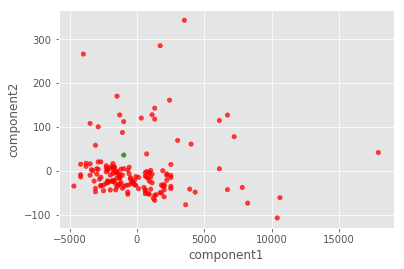

In [80]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)

ax = drawVectors(T, pca.components_, df.columns.values, plt, False)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [75]:
# same with scaling

scaled = preprocessing.StandardScaler().fit_transform(df)
scaled = pd.DataFrame(scaled, columns=df.columns)  
print("New Variances:\n{}".format(scaled.var()))
print("\nNew Describe:\n{}".format(scaled.describe()))

New Variances:
bgr    1.006369
rc     1.006369
wc     1.006369
dtype: float64

New Describe:
                bgr            rc            wc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  1.068063e-16  9.345548e-17
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -2.747446e+00 -1.500159e+00
25%   -5.305059e-01 -3.855519e-01 -6.259123e-01
50%   -2.447210e-01  5.730335e-02 -2.168611e-01
75%    6.306235e-03  6.969831e-01  4.167672e-01
max    5.540492e+00  3.058878e+00  5.750474e+00


Features by importance:
[(3.9998071556884818, 'wc'), (3.2588876641210898, 'bgr'), (3.009752752998361, 'rc')]


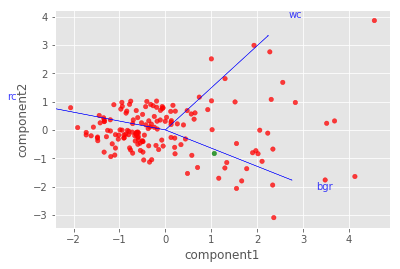

In [79]:
pca = PCA(n_components=2)
pca.fit(scaled)
T = pca.transform(scaled)

ax = drawVectors(T, pca.components_, scaled.columns.values, plt, True)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()